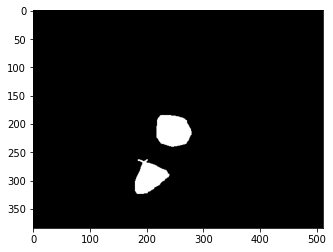

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import shapes

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import measure

data = shapes.load_shapes("/home/yuchen/shapes/data/shapes.h5", subjects=['12-005'],stim_class=None)
temp = data[data.num_regions==2].reset_index(drop=True)
plt.imshow(temp.image[25],cmap='gray')

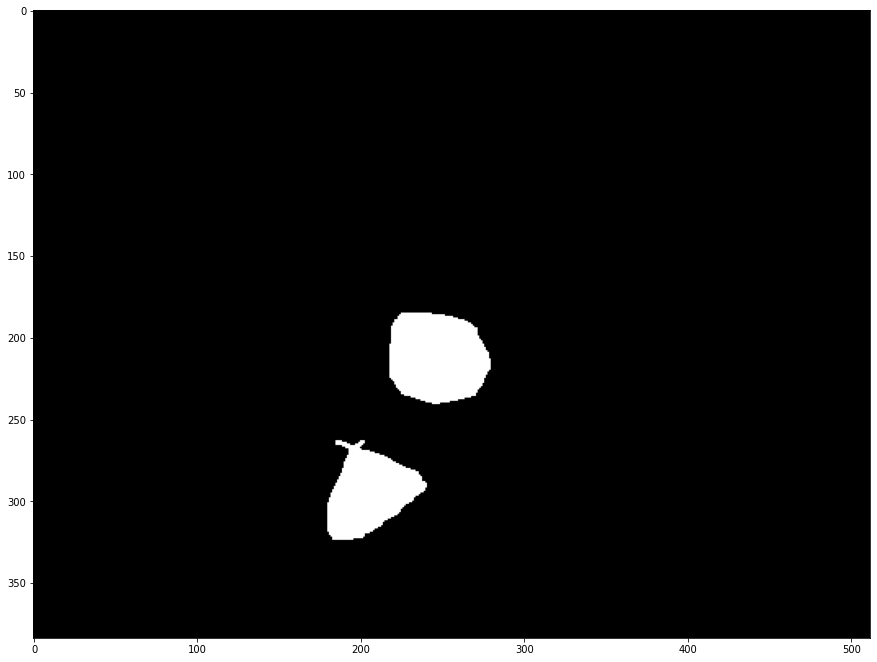

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image, cmap=plt.cm.gray)

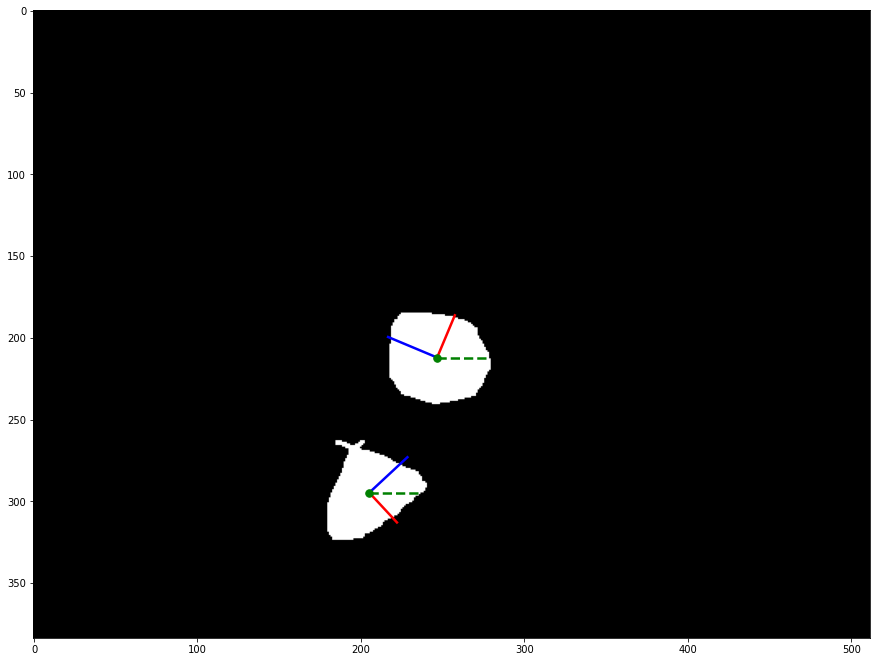

In [33]:
image = temp.image[25]

label_img = label(image)
regions = regionprops(label_img)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
    
    x3 = 30+x0

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)  # minor axis
    ax.plot((x0, x2), (y0, y2), '-b', linewidth=2.5)  # major axis
    ax.plot((x0, x3), (y0, y0), '--g', linewidth=2.5)  # major axis
    ax.plot(x0, y0, '.g', markersize=15)
        
ax.axis()
plt.show()

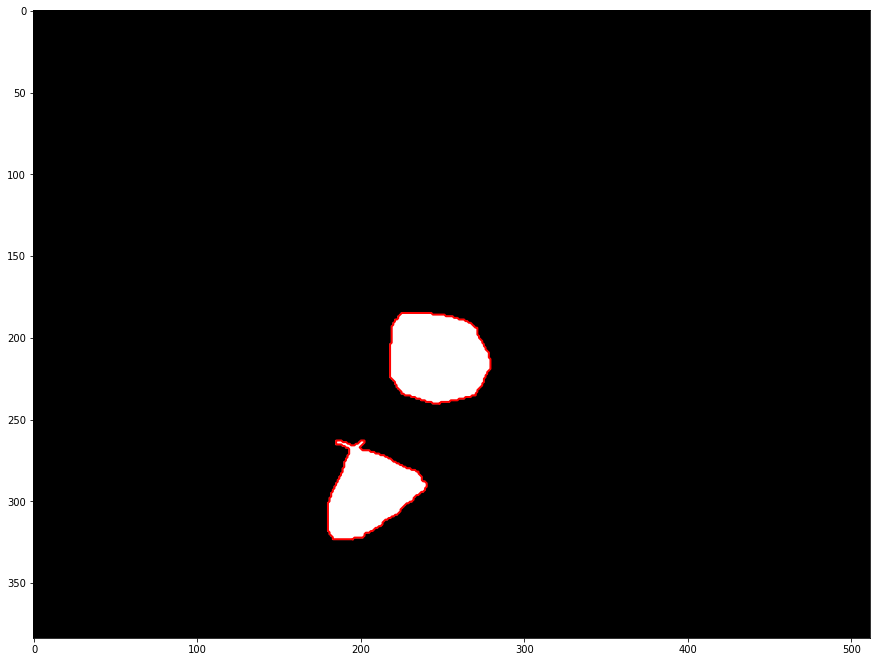

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
contours = measure.find_contours(image, 0.8)
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2,color='r')

In [9]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length
0,212.061685,246.592175,1.174332,65.058104,56.003228
1,294.730496,205.082004,-0.821593,63.711977,49.704125
